 # CIFAR-100


# 1. CNN Model

## Improting Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, applications, optimizers
from sklearn.metrics import confusion_matrix, classification_report

## Load CIFAR-100 dataset

In [6]:
(X_train_cifar100, y_train_cifar100), (X_test_cifar100, y_test_cifar100) = keras.datasets.cifar100.load_data()

## Plot - CIFAR-100 dataset

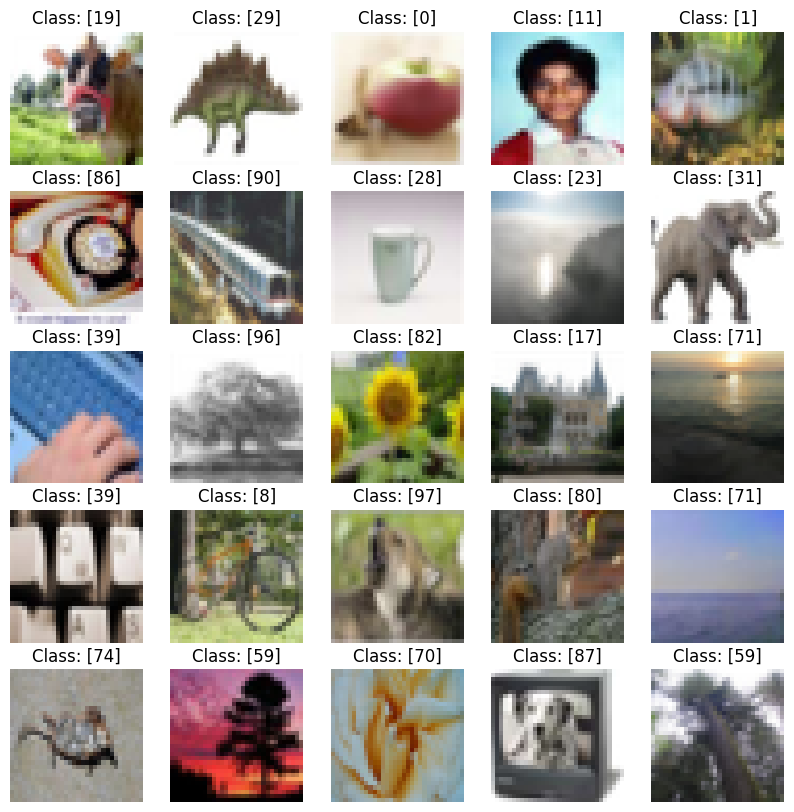

In [7]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train_cifar100[i])
    plt.title(f'Class: {y_train_cifar100[i]}')
    plt.axis('off')
plt.show()

## Train and Evaluate Models on CIFAR-100 dataset

In [21]:
num_epochs = 10

# Train and evaluate CNN model
model_cnn_cifar100 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(100, activation='softmax')
])

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 4.4964 - accuracy: 0.0333 - val_loss: 4.1543 - val_accuracy: 0.0788
Epoch 2/10
1563/1563 [==============================] - 70s 44ms/step - loss: 3.8333 - accuracy: 0.1254 - val_loss: 3.6062 - val_accuracy: 0.1648
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 3.3731 - accuracy: 0.2031 - val_loss: 3.4348 - val_accuracy: 0.1953
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 3.0376 - accuracy: 0.2626 - val_loss: 3.3608 - val_accuracy: 0.2257
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.7371 - accuracy: 0.3219 - val_loss: 3.3608 - val_accuracy: 0.2359
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 2.4413 - accuracy: 0.3832 - val_loss: 3.6351 - val_accuracy: 0.2228
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 2.1533 - accuracy: 0.4467 - val_loss: 3.7813 -

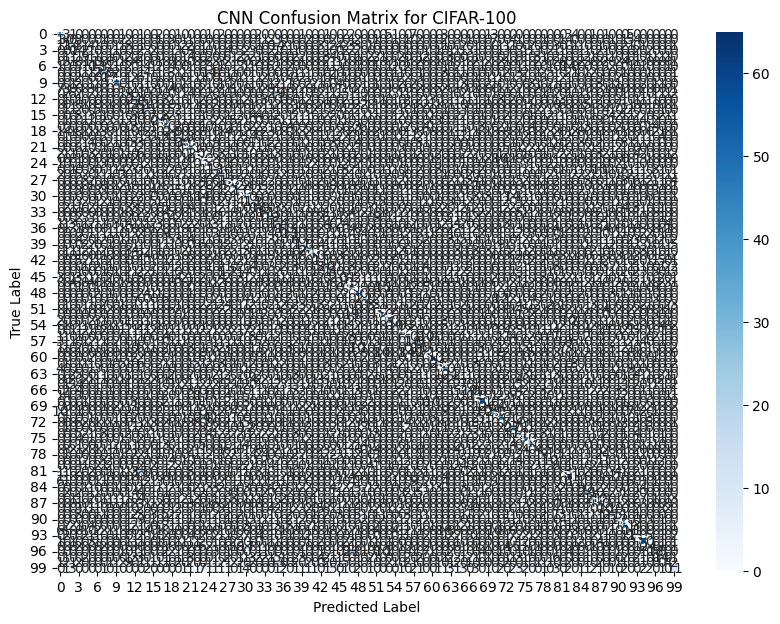

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       100
           1       0.32      0.30      0.31       100
           2       0.23      0.14      0.17       100
           3       0.09      0.14      0.11       100
           4       0.13      0.09      0.11       100
           5       0.12      0.11      0.11       100
           6       0.18      0.13      0.15       100
           7       0.27      0.23      0.25       100
           8       0.28      0.17      0.21       100
           9       0.46      0.37      0.41       100
          10       0.11      0.05      0.07       100
          11       0.08      0.09      0.08       100
          12       0.17      0.21      0.19       100
          13       0.12      0.22      0.16       100
          14       0.17      0.15      0.16       100
          15       0.10      0.07      0.08       100
          16       0.36      0.26      0.30       100


In [23]:
model_cnn_cifar100.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn_cifar100 = model_cnn_cifar100.fit(X_train_cifar100, y_train_cifar100, epochs=num_epochs, validation_data=(X_test_cifar100, y_test_cifar100), verbose=1)
cm_cnn_cifar100, cr_cnn_cifar100 = evaluate_model(model_cnn_cifar100, X_test_cifar100, y_test_cifar100)
print("CNN Confusion Matrix:")
print(cm_cnn_cifar100)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn_cifar100, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix for CIFAR-100')
plt.show()
print("CNN Classification Report:")
print(cr_cnn_cifar100)

## 2. Train and Evaluate ResNet Model

Epoch 1/10
1563/1563 [==============================] - 3049s 2s/step - loss: 5.1366 - accuracy: 0.0441 - val_loss: 5.1411 - val_accuracy: 0.0470
Epoch 2/10
1563/1563 [==============================] - 3181s 2s/step - loss: 4.3599 - accuracy: 0.0810 - val_loss: 7.4778 - val_accuracy: 0.0908
Epoch 3/10
1563/1563 [==============================] - 3437s 2s/step - loss: 3.9649 - accuracy: 0.1254 - val_loss: 5.0165 - val_accuracy: 0.1101
Epoch 4/10
1563/1563 [==============================] - 3355s 2s/step - loss: 3.7592 - accuracy: 0.1538 - val_loss: 4214.2749 - val_accuracy: 0.0117
Epoch 5/10
1563/1563 [==============================] - 3388s 2s/step - loss: 3.5505 - accuracy: 0.1781 - val_loss: 3.7735 - val_accuracy: 0.1860
Epoch 6/10
1563/1563 [==============================] - 3445s 2s/step - loss: 3.2767 - accuracy: 0.2141 - val_loss: 10.0754 - val_accuracy: 0.1986
Epoch 7/10
1563/1563 [==============================] - 3440s 2s/step - loss: 3.0317 - accuracy: 0.2540 - val_loss: 19.3

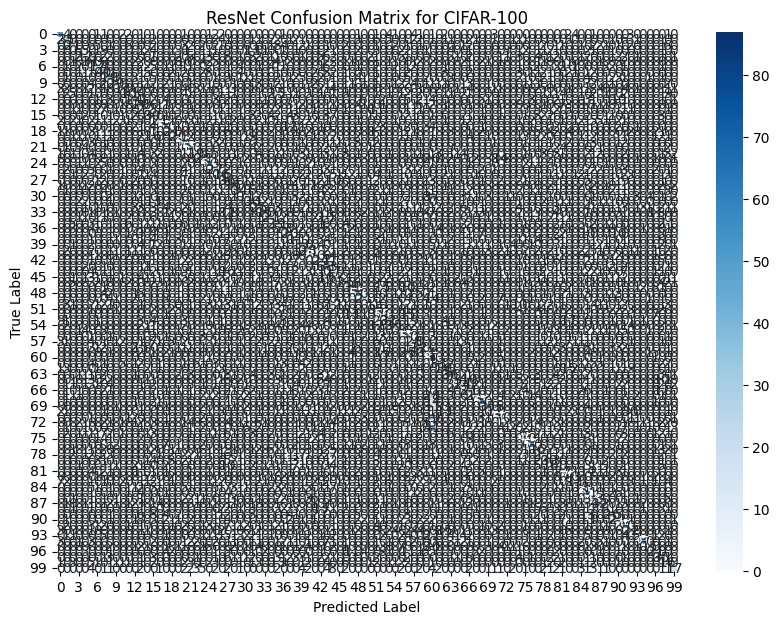

ResNet Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       100
           1       0.45      0.35      0.40       100
           2       0.32      0.21      0.25       100
           3       0.18      0.06      0.09       100
           4       0.22      0.12      0.15       100
           5       0.20      0.31      0.25       100
           6       0.29      0.17      0.22       100
           7       0.27      0.40      0.32       100
           8       0.31      0.29      0.30       100
           9       0.63      0.29      0.40       100
          10       0.36      0.13      0.19       100
          11       0.24      0.10      0.14       100
          12       0.35      0.24      0.28       100
          13       0.16      0.29      0.21       100
          14       0.28      0.12      0.17       100
          15       0.13      0.30      0.18       100
          16       0.46      0.21      0.29       1

In [24]:

resnet_cifar100 = applications.ResNet50(input_shape=(32, 32, 3), include_top=False, weights=None)
x = layers.GlobalAveragePooling2D()(resnet_cifar100.output)
outputs_resnet_cifar100 = layers.Dense(100, activation='softmax')(x)
model_resnet_cifar100 = models.Model(resnet_cifar100.input, outputs_resnet_cifar100)
model_resnet_cifar100.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_resnet_cifar100 = model_resnet_cifar100.fit(X_train_cifar100, y_train_cifar100, epochs=num_epochs, validation_data=(X_test_cifar100, y_test_cifar100), verbose=1)
cm_resnet_cifar100, cr_resnet_cifar100 = evaluate_model(model_resnet_cifar100, X_test_cifar100, y_test_cifar100)
print("ResNet Confusion Matrix:")
print(cm_resnet_cifar100)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_resnet_cifar100, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ResNet Confusion Matrix for CIFAR-100')
plt.show()
print("ResNet Classification Report:")
print(cr_resnet_cifar100)

# 3. VGGNet Using Pre-Trained Model

In [21]:
! pip install "torch>=1.10.0"
! pip install "torchvision >=0.12.0"
! pip install torchsummary
! pip install torchinfo
! pip install onnx
! pip install onnxruntime
! pip install tqdm
! pip install thop


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/14.4 MB ? eta -:--:--
   - -------------------------------------- 0.7/14.4 MB 14.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.6/14.4 MB 27.8 MB/s eta 0:00:01
   ---------- ----------------------------- 3.8/14.4 MB 27.0 MB/s eta 0:00:01
   ----------------- ---------------------- 6.1/14.4 MB 32.6 MB/s eta 0:00:01
   ---------------------- ----------------- 8.1/14.4 MB 32.4 MB/s eta 0:00:01
   -------------------------- ------------- 9.5/14.4 MB 32.0 MB/s eta 0:00:01
   --------------------------------- ------ 12.1/14.4 MB 38.5 MB/s eta 0:00:01
   ------------------------------------- -- 13.5/14.4 MB 36.4 MB/s eta 0:00:01
   ---------------------------------------  14.4/14.4 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------  14.4/14.4 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 14.4/14.4 MB 31.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.6 MB 17.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.7/5.6 MB 18.0 MB/s eta 0:00:01
   ---------------------- ----------------- 3.1/5.6 MB 22.0 MB/s eta 0:00:01
   -------------------------------- ------- 4.5/5.6 MB 26.1 MB/s eta 0:00:01
   ---------------------------------------  5.6/5.6 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 25.5 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
   ---------------------------------------- 0.0/46.0 kB ? eta -:--:--
   ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/86.8 kB ? eta -:--:--
   ---------------------------------------- 86.8/86.8 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.4 requires pyparsing==2.4.7, but you have pyparsing 3.1.1 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [22]:
import torch
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar100_vgg16_bn", pretrained=True)

if torch.cuda.is_available():
    device = 'cuda'
    print("Using GPU.")
else:
    device = 'cpu'
    print("Using CPU.")

model = model.to(device)

dummy_input = torch.ones((1,3,32,32)).to(device)
torch.onnx.export(model,dummy_input,"VGG16.onnx",verbose=False,opset_version=14)

from torchvision import datasets, transforms
# data will be downloaded in data_directory.
data_directory = './data'
batchsize=256

normalize = transforms.Normalize(mean=[0.507, 0.4865, 0.4409],
                                    std=[0.2673, 0.2564, 0.2761])

train_dataset = datasets.CIFAR100(root=data_directory,
                                  train=True,
                                  transform=transforms.Compose([
                                                                  transforms.RandomCrop(32, padding=4),
                                                                  transforms.RandomHorizontalFlip(),
                                                                  transforms.ToTensor(),
                                                                  normalize]),
                                  download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batchsize,
                                           shuffle=True,
                                           pin_memory=True,
                                           num_workers=2)

test_dataset = datasets.CIFAR100(root=data_directory,
                                 train=False,
                                 transform=transforms.Compose([
                                                                  transforms.ToTensor(),
                                                                  normalize]),
                                    download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batchsize,
                                          shuffle=False,
                                          pin_memory=True,
                                          num_workers=2)

Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/zipball/master" to C:\Users\Dell/.cache\torch\hub\master.zip
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/releases/download/vgg/cifar100_vgg16_bn-7d8c4031.pt" to C:\Users\Dell/.cache\torch\hub\checkpoints\cifar100_vgg16_bn-7d8c4031.pt
100%|█████████████████████████████████████████████████████████████████████████████| 58.4M/58.4M [00:07<00:00, 7.83MB/s]


Using CPU.
============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



100%|███████████████████████████████████████████████████████████████| 169001437/169001437 [00:29<00:00, 5757554.71it/s]


Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [26]:
#compressed_model = torch.load('VGG16_compressed_model_L2Norm_04.pt').to(device) # VGG16_compressed_model_L2Norm_P07.pt

import torch.nn as nn
from torch.optim.lr_scheduler import CosineAnnealingLR

lr = 0.001
epochs = 20
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr,
                            momentum=0.9, nesterov=True, weight_decay=5e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=200, eta_min=0, verbose=False)

print("All parameters and hyperparameters are set.")

All parameters and hyperparameters are set.


In [28]:
import tqdm
# training code
def train(model,criterion, optimizer, scheduler,loader,epoch):
    global device
    for images, labels in tqdm.tqdm(loader):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    scheduler.step()
    return loss
    
# validation code
def validate(model,loader):
    global device
    model.eval()
    correct = 0.
    total = 0.
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            pred = model(images)

        pred = torch.max(pred.data, 1)[1]
        total += labels.size(0)
        correct += (pred == labels).sum().item()

    val_acc = (correct / total)*100
    model.train()
    return val_acc

# fine-tune
print("Fine-tuning start...")
best_val = 0
for epoch in range(1,epochs+1):
    
    train(model,criterion,optimizer,scheduler,train_loader,epoch)
    
    val_acc = validate(model,test_loader)
    best_val = max(val_acc,best_val)
    
    print(f"epoch[{epoch}/{epochs}] val_acc:{val_acc}")
    
print(f"Fine-tuning is done. Best Accuracy is {best_val}.")

Fine-tuning start...


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:05<00:00,  8.29s/it]


epoch[1/20] val_acc:73.83


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [29:14<00:00,  8.95s/it]


epoch[2/20] val_acc:74.05000000000001


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [33:00<00:00, 10.10s/it]


epoch[3/20] val_acc:73.83999999999999


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [29:07<00:00,  8.92s/it]


epoch[4/20] val_acc:73.72


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:04<00:00,  8.29s/it]


epoch[5/20] val_acc:73.81


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:45<00:00,  8.49s/it]


epoch[6/20] val_acc:73.71


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [38:09<00:00, 11.68s/it]


epoch[7/20] val_acc:73.9


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:29<00:00,  8.42s/it]


epoch[8/20] val_acc:73.88


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:24<00:00,  8.39s/it]


epoch[9/20] val_acc:73.89


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:41<00:00,  8.48s/it]


epoch[10/20] val_acc:73.92


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:29<00:00,  8.42s/it]


epoch[11/20] val_acc:73.74000000000001


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:25<00:00,  8.39s/it]


epoch[12/20] val_acc:73.78


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:19<00:00,  8.37s/it]


epoch[13/20] val_acc:74.1


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:35<00:00,  8.44s/it]


epoch[14/20] val_acc:74.24


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:37<00:00,  8.46s/it]


epoch[15/20] val_acc:73.94


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:23<00:00,  8.38s/it]


epoch[16/20] val_acc:73.95


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:28<00:00,  8.41s/it]


epoch[17/20] val_acc:73.89


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:36<00:00,  8.45s/it]


epoch[18/20] val_acc:73.99


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:25<00:00,  8.39s/it]


epoch[19/20] val_acc:74.1


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [27:23<00:00,  8.38s/it]


epoch[20/20] val_acc:73.97
Fine-tuning is done. Best Accuracy is 74.24.


In [29]:
vgg_model_accuracy = validate(model,test_loader)

print("--- VGG16 model ==>")
print(f"Accuracy: {round(vgg_model_accuracy,3)}%")

--- VGG16 model ==>
Accuracy: 73.97%


In [32]:
# Define a function to generate predictions for the test dataset
def generate_predictions(model, test_loader):
    predictions = []
    true_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return np.array(predictions), np.array(true_labels)

# Generate predictions for the test dataset
predictions, true_labels = generate_predictions(model, test_loader)

# Generate classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Generate confusion matrix
print("Confusion Matrix:")
vgg_cm = confusion_matrix(true_labels, predictions)
print(vgg_cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       100
           1       0.92      0.87      0.89       100
           2       0.64      0.61      0.63       100
           3       0.58      0.57      0.57       100
           4       0.56      0.66      0.61       100
           5       0.79      0.73      0.76       100
           6       0.81      0.81      0.81       100
           7       0.71      0.75      0.73       100
           8       0.87      0.88      0.88       100
           9       0.80      0.86      0.83       100
          10       0.55      0.51      0.53       100
          11       0.51      0.54      0.53       100
          12       0.80      0.81      0.81       100
          13       0.73      0.66      0.69       100
          14       0.72      0.72      0.72       100
          15       0.79      0.81      0.80       100
          16       0.76      0.78      0.77       100
    

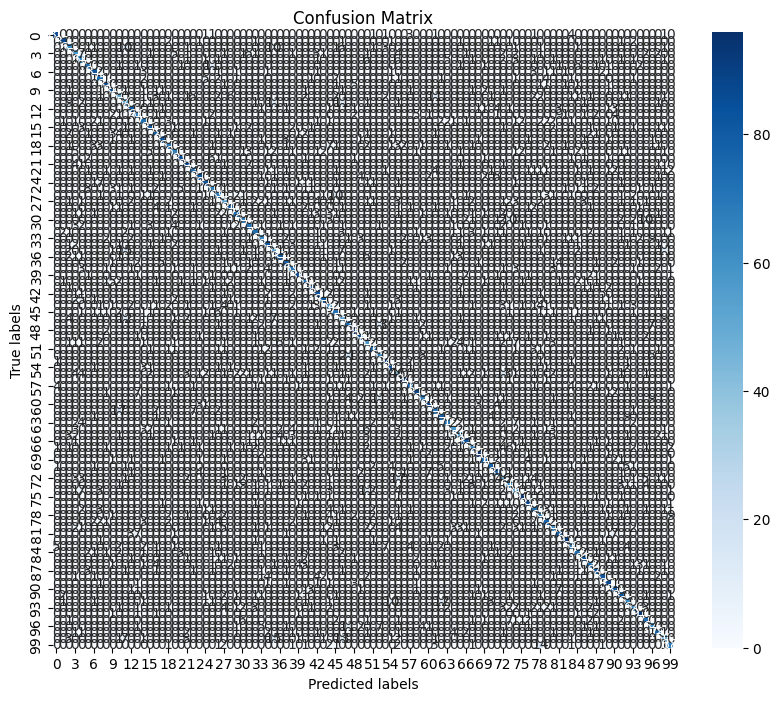

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(vgg_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# References:
The VGGNet experiment on CIFAR-100 dataset is from below source. Only the classifcation report and confusion matrix is used on the thesis. 

1. Chenyaofo. (2021). GitHub - chenyaofo/pytorch-cifar-models: Pretrained models on CIFAR10/100 in PyTorch. GitHub. https://github.com/chenyaofo/pytorch-cifar-models?tab=readme-ov-file